In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [98]:
# load the data
df = pd.read_csv("war_survival_data.csv")

In [99]:
df.describe()

,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.489000,14.692000,3.039983,5.154000,9.612000,25.105000,47.564000,5.069000,2.430000,10.08500
std,12.241394,8.968588,1.119788,3.217551,6.071929,14.832261,28.792654,3.157247,1.719901,6.25579
min,18.000000,0.000000,1.015703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,28.000000,7.000000,2.050631,2.000000,4.000000,12.000000,22.000000,2.000000,1.000000,4.00000
50%,38.000000,15.000000,3.102646,5.000000,9.000000,25.000000,48.000000,5.000000,2.000000,10.00000
75%,49.000000,22.000000,3.951179,8.000000,15.000000,38.000000,73.000000,8.000000,4.000000,16.00000
max,60.000000,30.000000,4.995550,10.000000,20.000000,50.000000,100.000000,10.000000,5.000000,20.00000


In [100]:
df.min()

Name                                  Emma
Age                                     18
Food Supply (Days)                       0
Water per Day (Liters)            1.015703
First Aid Kits                           0
Antibiotics                              0
Painkillers                              0
Weapons Available                        0
Defensive Structures                     0
Training Level                           0
Radios Available                         0
Access to Reliable Information          No
Support Groups Available                No
Entertainment Available              Books
dtype: object

In [101]:
df.max()

Name                              William
Age                                    60
Food Supply (Days)                     30
Water per Day (Liters)            4.99555
First Aid Kits                         10
Antibiotics                            20
Painkillers                            50
Weapons Available                     100
Defensive Structures                   10
Training Level                          5
Radios Available                       20
Access to Reliable Information        Yes
Support Groups Available              Yes
Entertainment Available             Games
dtype: object

In [102]:
df['Entertainment Available'].unique()

array(['Books', 'Games'], dtype=object)

In [103]:
df

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available
0,Sophia,43,13,4.150040,4,10,21,21,5,2,15,No,Yes,Books
1,Emma,35,10,3.127285,10,16,8,30,7,3,12,No,Yes,Games
2,Sophia,30,14,3.529119,4,13,23,76,8,3,11,Yes,No,Books
3,James,53,16,4.840361,10,14,10,60,4,2,16,No,No,Games
4,Michael,27,3,4.845704,4,15,31,89,0,2,14,Yes,Yes,Books
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Michael,34,20,3.131152,10,7,48,93,5,3,2,Yes,Yes,Games
996,William,42,3,3.797801,0,3,32,36,8,3,13,Yes,No,Games
997,Jane,22,13,2.968983,6,1,5,21,10,1,6,No,Yes,Books
998,Michael,32,15,4.455705,5,8,5,12,10,4,11,No,Yes,Games


In [104]:
# Convert column 'Entertainment Available' into
# numeric format of 0 = Books and 1 = Games
from sklearn.preprocessing import LabelEncoder
variables = ['Entertainment Available']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)


In [105]:
df['Entertainment Available']

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: Entertainment Available, Length: 1000, dtype: int32

In [106]:
df['Name'].unique()

array(['Sophia', 'Emma', 'James', 'Michael', 'Olivia', 'Jane', 'William',
       'John'], dtype=object)

In [107]:
df

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available
0,Sophia,43,13,4.150040,4,10,21,21,5,2,15,No,Yes,0
1,Emma,35,10,3.127285,10,16,8,30,7,3,12,No,Yes,1
2,Sophia,30,14,3.529119,4,13,23,76,8,3,11,Yes,No,0
3,James,53,16,4.840361,10,14,10,60,4,2,16,No,No,1
4,Michael,27,3,4.845704,4,15,31,89,0,2,14,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Michael,34,20,3.131152,10,7,48,93,5,3,2,Yes,Yes,1
996,William,42,3,3.797801,0,3,32,36,8,3,13,Yes,No,1
997,Jane,22,13,2.968983,6,1,5,21,10,1,6,No,Yes,0
998,Michael,32,15,4.455705,5,8,5,12,10,4,11,No,Yes,1


In [108]:
# Provided list of names
names = ['Sophia', 'Emma', 'James', 'Michael', 'Olivia', 'Jane', 'William', 'John']

gender = {'Sophia': 'female', 'Emma': 'female', 'James': 'male', 'Michael': 'male', 
          'Olivia': 'female', 'Jane': 'female', 'William': 'male', 'John': 'male'}

# Convert the dictionary into DataFrame
df = pd.DataFrame(df)

# Provide 'Gender' as the column name and assign gender values
df['Gender'] = df['Name'].map(gender)

df = df.drop('Name', axis=1)

# Observe the output
print(df)

     Age  Food Supply (Days)  Water per Day (Liters)  First Aid Kits  \
0     43                  13                4.150040               4   
1     35                  10                3.127285              10   
2     30                  14                3.529119               4   
3     53                  16                4.840361              10   
4     27                   3                4.845704               4   
..   ...                 ...                     ...             ...   
995   34                  20                3.131152              10   
996   42                   3                3.797801               0   
997   22                  13                2.968983               6   
998   32                  15                4.455705               5   
999   38                   9                1.444102               9   

     Antibiotics  Painkillers  Weapons Available  Defensive Structures  \
0             10           21                 21             

In [109]:
# Provided list of names
#names = ['Sophia', 'Emma', 'James', 'Michael', 'Olivia', 'Jane', 'William', 'John']

# Define names into gender values and then into numerical form of
# 0 = people with female name and 1 = people with male name
#gender = {'Sophia': '0', 'Emma': '0', 'James': '1', 'Michael': '1', 
#          'Olivia': '0', 'Jane': '0', 'William': '1', 'John': '1'}

# Convert the dictionary into DataFrame
#df = pd.DataFrame(df)

# Provide 'Gender' as the column name and assign gender values
#df['Gender'] = df['Name'].map(gender)

# Observe the output
#print(df)

In [110]:
df

,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available,Gender
0,43,13,4.150040,4,10,21,21,5,2,15,No,Yes,0,female
1,35,10,3.127285,10,16,8,30,7,3,12,No,Yes,1,female
2,30,14,3.529119,4,13,23,76,8,3,11,Yes,No,0,female
3,53,16,4.840361,10,14,10,60,4,2,16,No,No,1,male
4,27,3,4.845704,4,15,31,89,0,2,14,Yes,Yes,0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,20,3.131152,10,7,48,93,5,3,2,Yes,Yes,1,male
996,42,3,3.797801,0,3,32,36,8,3,13,Yes,No,1,male
997,22,13,2.968983,6,1,5,21,10,1,6,No,Yes,0,female
998,32,15,4.455705,5,8,5,12,10,4,11,No,Yes,1,male


In [111]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to turn columns 'Access to Reliable Information',
#'Support Groups Available', 'Gender' into numerical format
variables = ['Access to Reliable Information', 'Support Groups Available', 'Gender']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [112]:
df

,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available,Gender
0,43,13,4.150040,4,10,21,21,5,2,15,0,1,0,0
1,35,10,3.127285,10,16,8,30,7,3,12,0,1,1,0
2,30,14,3.529119,4,13,23,76,8,3,11,1,0,0,0
3,53,16,4.840361,10,14,10,60,4,2,16,0,0,1,1
4,27,3,4.845704,4,15,31,89,0,2,14,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,20,3.131152,10,7,48,93,5,3,2,1,1,1,1
996,42,3,3.797801,0,3,32,36,8,3,13,1,0,1,1
997,22,13,2.968983,6,1,5,21,10,1,6,0,1,0,0
998,32,15,4.455705,5,8,5,12,10,4,11,0,1,1,1


In [113]:
# check for duplicates
df.duplicated().sum()

0

In [114]:
# check for missing values
df.isna().sum()

Age                               0
Food Supply (Days)                0
Water per Day (Liters)            0
First Aid Kits                    0
Antibiotics                       0
Painkillers                       0
Weapons Available                 0
Defensive Structures              0
Training Level                    0
Radios Available                  0
Access to Reliable Information    0
Support Groups Available          0
Entertainment Available           0
Gender                            0
dtype: int64

In [115]:
# Drop column 'Training LevelTraining Level' from dataset
# and add it to y variable to become the target variable
X = df.drop('Age', axis=1)
y = df['Age']

Train / test split

In [116]:
df

,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available,Gender
0,43,13,4.150040,4,10,21,21,5,2,15,0,1,0,0
1,35,10,3.127285,10,16,8,30,7,3,12,0,1,1,0
2,30,14,3.529119,4,13,23,76,8,3,11,1,0,0,0
3,53,16,4.840361,10,14,10,60,4,2,16,0,0,1,1
4,27,3,4.845704,4,15,31,89,0,2,14,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,20,3.131152,10,7,48,93,5,3,2,1,1,1,1
996,42,3,3.797801,0,3,32,36,8,3,13,1,0,1,1
997,22,13,2.968983,6,1,5,21,10,1,6,0,1,0,0
998,32,15,4.455705,5,8,5,12,10,4,11,0,1,1,1


In [117]:
# Create train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=156)

Based on iterations, best k-value is this:
11


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

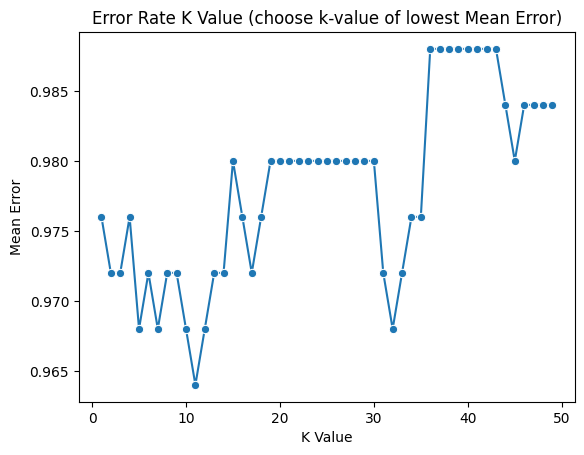

In [118]:
# determine the optimal k-value for this algorithm

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
# this has to always be less than the amount of rows
# in the training data
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski"))
model.fit(X_train, y_train)

In [119]:
# Make a prediction of test data
predictions = model.predict(X_test)

In [120]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

          18       0.03      0.20      0.05         5
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         7
          21       0.10      0.29      0.14         7
          22       0.00      0.00      0.00         7
          23       0.00      0.00      0.00         6
          24       0.00      0.00      0.00         5
          25       0.00      0.00      0.00         6
          26       0.00      0.00      0.00         5
          27       0.00      0.00      0.00         4
          28       0.00      0.00      0.00         7
          29       0.00      0.00      0.00         7
          30       0.00      0.00      0.00         5
          31       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         5
          33       0.00      0.00      0.00         6
          34       0.25      0.25      0.25         4
          35       0.00    

c:\Users\vilil\Desktop\Machine_Learning_2024_Newest\Machine_Learning_2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vilil\Desktop\Machine_Learning_2024_Newest\Machine_Learning_2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vilil\Desktop\Machine_Learning_2024_Newest\Machine_Learning_2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 